In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

In [2]:
df_new_copy = pd.read_csv('../../Dissertation_projects/Absorption_experiments/Data/Data_output_error_test_new_method.csv', sep=',', index_col=0)
df_old_copy = pd.read_csv('../../Dissertation_projects/Absorption_experiments/Data/Data_output_error_test_old_method.csv', sep=',', index_col=0)

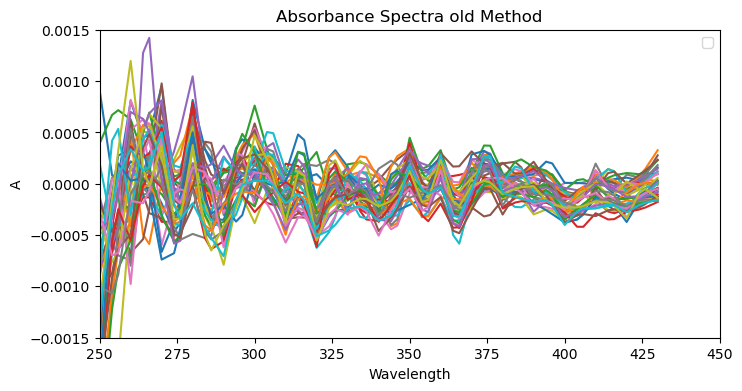

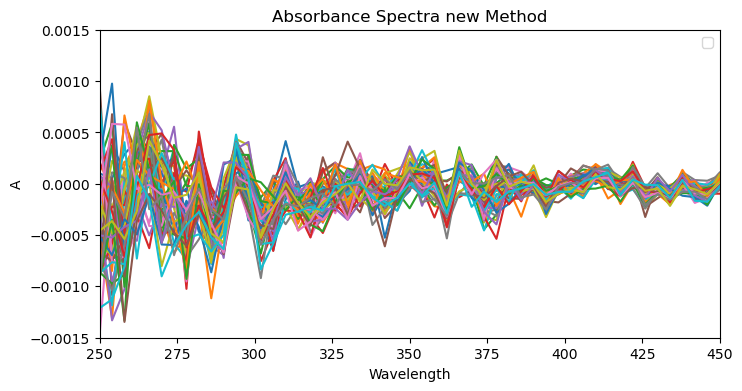

In [3]:
df_new = pd.read_csv('../../Dissertation_projects/Absorption_experiments/Data/Data_output_error_test_new_method.csv', sep=',', index_col=0)
df_old = pd.read_csv('../../Dissertation_projects/Absorption_experiments/Data/Data_output_error_test_old_method.csv', sep=',', index_col=0)
df_new_a = (df_new*0.1)/(2.303)
df_old_a = (df_old*0.1)/(2.303)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df_old_a.plot(ax=axs)
axs.set_xlim(250,450)
axs.set_ylim(-0.0015,0.0015)
axs.set_xlabel("Wavelength")
axs.set_ylabel("A")
axs.legend("")
axs.set_title("Absorbance Spectra old Method")
plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/Error_test_figs/Abs_scanns_old.png")


fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df_new_a.plot(ax=axs)
axs.set_xlim(250,450)
axs.set_ylim(-0.0015,0.0015)
axs.set_xlabel("Wavelength")
axs.set_ylabel("A")
axs.legend("")
axs.set_title("Absorbance Spectra new Method")
plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/Error_test_figs/Abs_scanns_new.png")


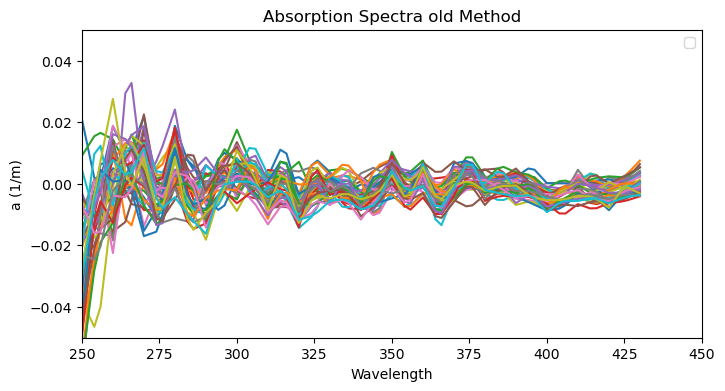

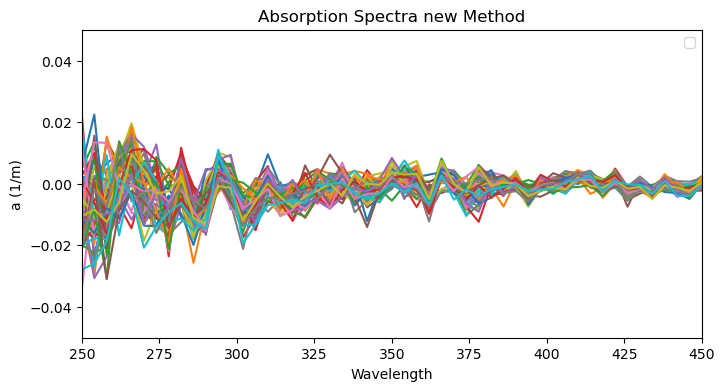

In [4]:
df_new = pd.read_csv('../../Dissertation_projects/Absorption_experiments/Data/Data_output_error_test_new_method.csv', sep=',', index_col=0)
df_old = pd.read_csv('../../Dissertation_projects/Absorption_experiments/Data/Data_output_error_test_old_method.csv', sep=',', index_col=0)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df_old.plot(ax=axs)
axs.set_xlim(250,450)
axs.set_ylim(-0.05,0.05)
axs.set_xlabel("Wavelength")
axs.set_ylabel("a (1/m)")
axs.legend("")
axs.set_title("Absorption Spectra old Method")
plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/Error_test_figs/Aborp_scanns_old.png")


fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df_new.plot(ax=axs)
axs.set_xlim(250,450)
axs.set_ylim(-0.05,0.05)
axs.set_xlabel("Wavelength")
axs.set_ylabel("a (1/m)")
axs.legend("")
axs.set_title("Absorption Spectra new Method")
plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/Error_test_figs/Aborp_scanns_new.png")


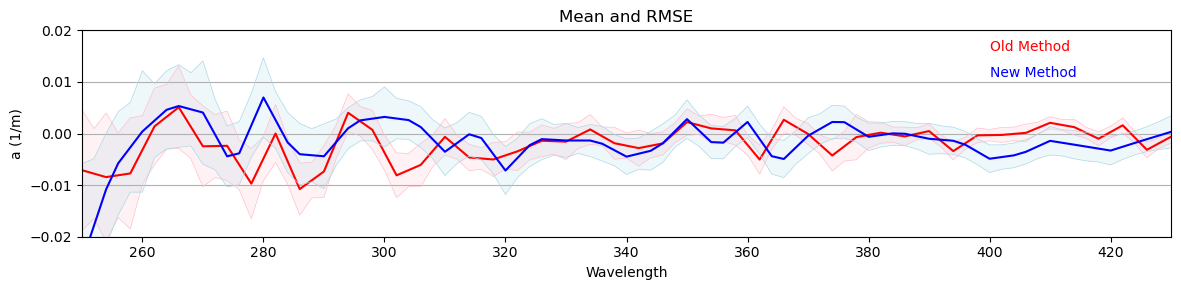

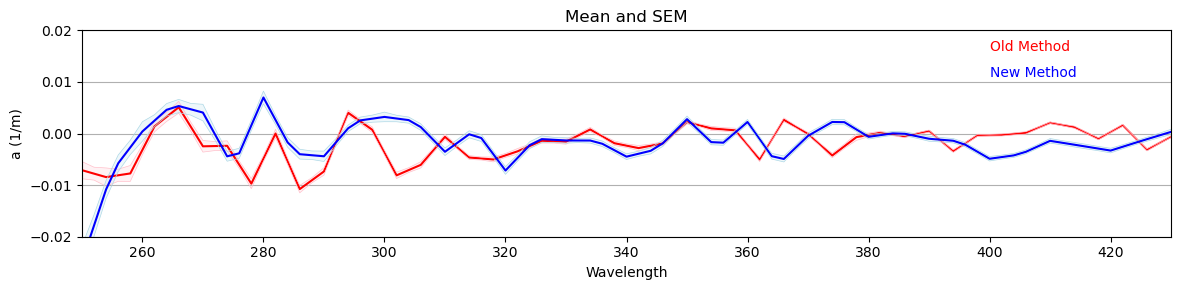

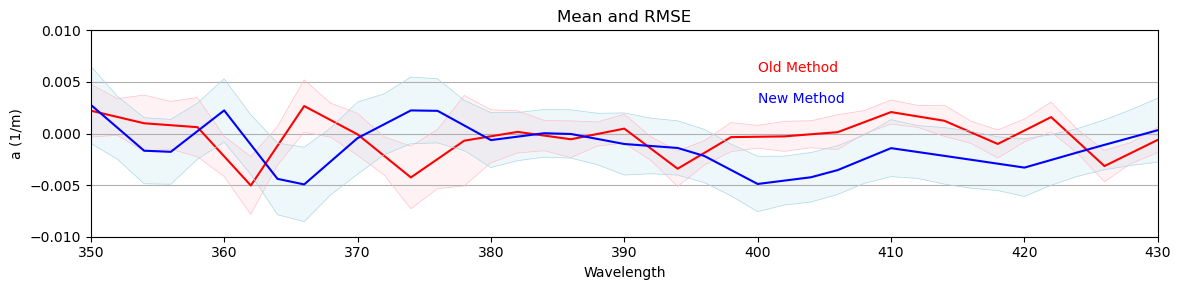

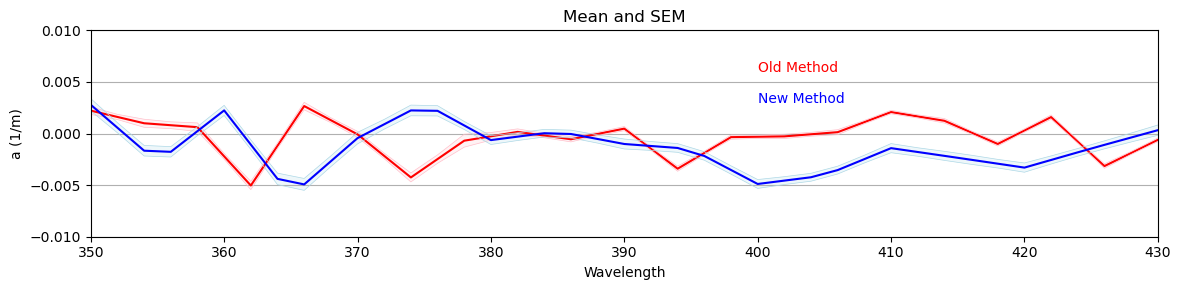

In [5]:
df_new = pd.read_csv('../../Dissertation_projects/Absorption_experiments/Data/Data_output_error_test_new_method.csv', sep=',', index_col=0)
df_old = pd.read_csv('../../Dissertation_projects/Absorption_experiments/Data/Data_output_error_test_old_method.csv', sep=',', index_col=0)

df_n = pd.read_csv('../../Dissertation_projects/Absorption_experiments/Data/Data_output_error_test_new_method.csv', sep=',', index_col=0)
df_o = pd.read_csv('../../Dissertation_projects/Absorption_experiments/Data/Data_output_error_test_old_method.csv', sep=',', index_col=0)


list_cols_old = df_old_copy.columns
list_cols_new = df_new_copy.columns

# Calculate RMSE and mean for each row OLD
df_old['mean_old'] = df_o.mean(axis=1)

df_old['rmse_old'] = np.sqrt(((df_o.sub(df_o.mean(axis=1), axis=0)) ** 2).mean(axis=1))
df_old['rmse_up_old'] = df_old['mean_old'] + df_old['rmse_old']
df_old['rmse_down_old'] = df_old['mean_old'] - df_old['rmse_old']

df_old['sem_old'] = df_o.sem(axis=1)
df_old['sem_up_old'] = df_old['mean_old'] + df_old['sem_old']
df_old['sem_down_old'] = df_old['mean_old'] - df_old['sem_old']

df_rmse_old = df_old.drop(list_cols_old, axis = 1)

# Calculate RMSE and mean for each row NEW
df_new['mean_new'] = df_n.mean(axis=1)

df_new['rmse_new'] = np.sqrt(((df_n.sub(df_n.mean(axis=1), axis=0)) ** 2).mean(axis=1))
df_new['rmse_up_new'] = df_new['mean_new'] + df_new['rmse_new']
df_new['rmse_down_new'] = df_new['mean_new'] - df_new['rmse_new']

df_new['sem_new'] = df_n.sem(axis=1)
df_new['sem_up_new'] = df_new['mean_new'] + df_new['sem_new']
df_new['sem_down_new'] = df_new['mean_new'] - df_new['sem_new']


df_rmse_new = df_new.drop(list_cols_new, axis = 1)

###### PLOT RMSE ######
df = df_rmse_new
df['wl'] = df.index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))
axes.fill_between(df['wl'], df['rmse_up_new'],  df['rmse_down_new'], alpha=.2, linewidth=0, color = 'pink')
axes.plot(df['wl'], df['mean_new'], color = 'red', linewidth=1.5)
axes.plot(df['wl'], df['rmse_up_new'], color = 'pink', linewidth=0.5)
axes.plot(df['wl'], df['rmse_down_new'],  color = 'pink', linewidth=0.5)

df = df_rmse_old
df['wl'] = df.index
axes.plot(df['wl'], df['mean_old'], color = 'blue', linewidth=1.5)
axes.fill_between(df['wl'], df['rmse_up_old'],  df['rmse_down_old'], alpha=.2, linewidth=0, color = 'lightblue')
axes.plot(df['wl'], df['rmse_up_old'], color = 'lightblue', linewidth=0.5)
axes.plot(df['wl'], df['rmse_down_old'],  color = 'lightblue', linewidth=0.5)
        
axes.set_xlabel("Wavelength")
axes.set_ylabel("a (1/m)")
axes.set_xlim(250,430)
axes.set_ylim(-0.02,0.02)
axes.text(400,.016,'Old Method', color = 'red')
axes.text(400,.011,'New Method', color = 'blue')
plt.title('Mean and RMSE')
#plt.legend()
plt.grid(axis='y') 
plt.tight_layout()


plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/Error_test_figs/RMSE_old_new.png")


###### PLOT SEM ######

df = df_rmse_new
df['wl'] = df.index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))
axes.fill_between(df['wl'], df['sem_up_new'], df['sem_down_new'], alpha=.2, linewidth=0, color='pink')
axes.plot(df['wl'], df['mean_new'], color='red', linewidth=1.5)
axes.plot(df['wl'], df['sem_up_new'], color='pink', linewidth=0.5)
axes.plot(df['wl'], df['sem_down_new'], color='pink', linewidth=0.5)

df = df_rmse_old
df['wl'] = df.index
axes.plot(df['wl'], df['mean_old'], color='blue', linewidth=1.5)
axes.fill_between(df['wl'], df['sem_up_old'], df['sem_down_old'], alpha=.2, linewidth=0, color='lightblue')
axes.plot(df['wl'], df['sem_up_old'], color='lightblue', linewidth=0.5)
axes.plot(df['wl'], df['sem_down_old'], color='lightblue', linewidth=0.5)

axes.set_xlabel("Wavelength")
axes.set_ylabel("a (1/m)")
axes.set_xlim(250, 430)
axes.set_ylim(-0.02, 0.02)
axes.text(400, .016, 'Old Method', color='red')
axes.text(400, .011, 'New Method', color='blue')
plt.title('Mean and SEM')
#plt.legend()
plt.grid(axis='y')
plt.tight_layout()


plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/Error_test_figs/SEM_old_new.png")


###### PLOT RMSE CLOSE ######
df = df_rmse_new
df['wl'] = df.index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))
axes.fill_between(df['wl'], df['rmse_up_new'],  df['rmse_down_new'], alpha=.2, linewidth=0, color = 'pink')
axes.plot(df['wl'], df['mean_new'], color = 'red', linewidth=1.5)
axes.plot(df['wl'], df['rmse_up_new'], color = 'pink', linewidth=0.5)
axes.plot(df['wl'], df['rmse_down_new'],  color = 'pink', linewidth=0.5)

df = df_rmse_old
df['wl'] = df.index
axes.plot(df['wl'], df['mean_old'], color = 'blue', linewidth=1.5)
axes.fill_between(df['wl'], df['rmse_up_old'],  df['rmse_down_old'], alpha=.2, linewidth=0, color = 'lightblue')
axes.plot(df['wl'], df['rmse_up_old'], color = 'lightblue', linewidth=0.5)
axes.plot(df['wl'], df['rmse_down_old'],  color = 'lightblue', linewidth=0.5)
        
axes.set_xlabel("Wavelength")
axes.set_ylabel("a (1/m)")
axes.set_xlim(350, 430)
axes.set_ylim(-0.01, 0.01)
axes.text(400, .006, 'Old Method', color='red')
axes.text(400, .003, 'New Method', color='blue')
plt.title('Mean and RMSE')
#plt.legend()
plt.grid(axis='y') 
plt.tight_layout()

plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/Error_test_figs/RMSE_old_new_close.png")


###### PLOT SEM CLOSE ######

df = df_rmse_new
df['wl'] = df.index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))
axes.fill_between(df['wl'], df['sem_up_new'], df['sem_down_new'], alpha=.2, linewidth=0, color='pink')
axes.plot(df['wl'], df['mean_new'], color='red', linewidth=1.5)
axes.plot(df['wl'], df['sem_up_new'], color='pink', linewidth=0.5)
axes.plot(df['wl'], df['sem_down_new'], color='pink', linewidth=0.5)

df = df_rmse_old
df['wl'] = df.index
axes.plot(df['wl'], df['mean_old'], color='blue', linewidth=1.5)
axes.fill_between(df['wl'], df['sem_up_old'], df['sem_down_old'], alpha=.2, linewidth=0, color='lightblue')
axes.plot(df['wl'], df['sem_up_old'], color='lightblue', linewidth=0.5)
axes.plot(df['wl'], df['sem_down_old'], color='lightblue', linewidth=0.5)

axes.set_xlabel("Wavelength")
axes.set_ylabel("a (1/m)")
axes.set_xlim(350, 430)
axes.set_ylim(-0.01, 0.01)
axes.text(400, .006, 'Old Method', color='red')
axes.text(400, .003, 'New Method', color='blue')
plt.title('Mean and SEM')
#plt.legend()
plt.grid(axis='y')
plt.tight_layout()


plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/Error_test_figs/SEM_old_new_close.png")


df_stats_pre_new = df_rmse_new
df_stats_pre_old = df_rmse_old

In [6]:
df_new = pd.read_csv('../../Dissertation_projects/Absorption_experiments/Data/Data_output_error_test_new_method.csv', sep=',', index_col=0)
df_old = pd.read_csv('../../Dissertation_projects/Absorption_experiments/Data/Data_output_error_test_old_method.csv', sep=',', index_col=0)

df_new['wl'] = df_new.index
df_new = df_new[df_new['wl'] <= 420]

df_old['wl'] = df_old.index
df_old = df_old[df_old['wl'] <= 420]


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_14504\3609135446.py:25: RuntimeWarning: divide by zero encountered in divide
  Zc = (v ** (11 / 12) / np.sqrt(K)) ** (2 / 3)


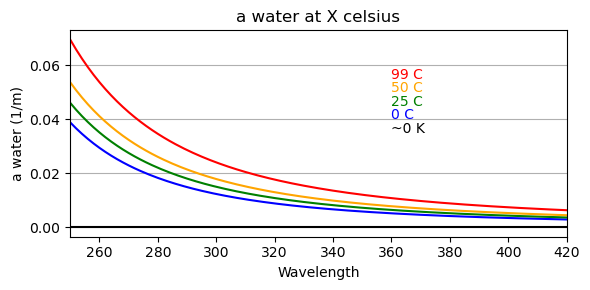

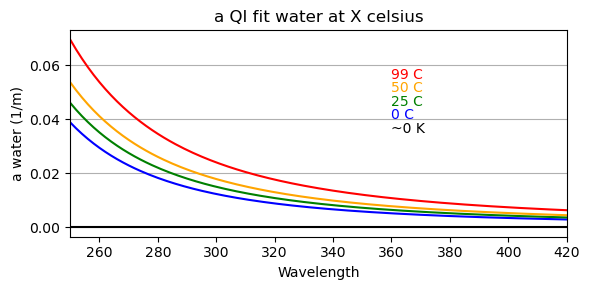

In [7]:
def JF2007_aw_UV(wl, T):
    """
    Parameters:
    wl : array-like or float
        Wavelength in nm, should be in the 180-420 nm range.
    T : float
        Temperature in degrees Celsius.
    
    Returns:
    a : array-like or float
        Combined absorption coefficient.
    a_QI_fit : array-like or float
        Quantum interference term of the absorption coefficient.
    a_GH_fit : array-like or float
        General harmonic term of the absorption coefficient.
    """
    
    # Convert wavelength to frequency in 1/cm
    v = (1 / 150 - 1 / wl) * 1e7
    
    # Convert temperature to Kelvin
    K = T + 273
    
    # Calculate Zc
    Zc = (v ** (11 / 12) / np.sqrt(K)) ** (2 / 3)
    
    # Calculate a_QI_fit from JF2007, Eq. 2.82
    a_QI_fit = 5e6 * v ** (-5 / 4) * np.exp(-0.076 * Zc)
    
    # Calculate a_GH_fit from JF2007, Eq. 2.78-2.79
    a_GH_fit = 7.067e-40 * np.exp(119 * 150 / (wl - (0.0465 * (T - 25))))
    
    # Calculate total absorption coefficient
    a = a_QI_fit + a_GH_fit
    
    return a, a_QI_fit, a_GH_fit


# this is the function to minimize the root mean squared 
def rmse(T, col_abs):
    cor = JF2007_aw_UV(wl, T)
    a = cor[0]
    col_resid = col_abs - a
    diff = np.sqrt(np.mean(col_resid**2))
    return  diff

array = np.arange(250, 421, 1)
array_0K = JF2007_aw_UV(array, -273)
array_T0 = JF2007_aw_UV(array, 0)
array_T25 = JF2007_aw_UV(array, 25)
array_T50 = JF2007_aw_UV(array, 50)
array_T99 = JF2007_aw_UV(array, 99)


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
axes.plot(array, array_0K[0], color='black', linewidth=1.5)
axes.plot(array, array_T0[0], color='blue', linewidth=1.5)
axes.plot(array, array_T25[0], color='green', linewidth=1.5)
axes.plot(array, array_T50[0], color='orange', linewidth=1.5)
axes.plot(array, array_T99[0], color='red', linewidth=1.5)

axes.set_xlabel("Wavelength")
axes.set_ylabel("a water (1/m)")
axes.set_xlim(250, 420)
#axes.set_ylim(-0.01, 0.01)
#axes.axhline(y=0.00005, color='black', linewidth=0.25)
#axes.axhline(y=-0.00005, color='black', linewidth=0.25)
#axes.text(360, .06, '0 K', color='black')
axes.text(360, .055, '99 C', color='red')
axes.text(360, .05, '50 C', color='orange')
axes.text(360, .045, '25 C', color='green')
axes.text(360, .04, '0 C', color='blue')
axes.text(360, .035, '~0 K', color='black')
plt.title('a water at X celsius')
#plt.legend()
plt.grid(axis='y')
plt.tight_layout()

plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/Error_test_figs/T_water_correction.png")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
axes.plot(array, array_0K[1], color='black', linewidth=1.5)
axes.plot(array, array_T0[1], color='blue', linewidth=1.5)
axes.plot(array, array_T25[1], color='green', linewidth=1.5)
axes.plot(array, array_T50[1], color='orange', linewidth=1.5)
axes.plot(array, array_T99[1], color='red', linewidth=1.5)

axes.set_xlabel("Wavelength")
axes.set_ylabel("a water (1/m)")
axes.set_xlim(250, 420)
#axes.set_ylim(-0.01, 0.01)
#axes.axhline(y=0.00005, color='black', linewidth=0.25)
#axes.axhline(y=-0.00005, color='black', linewidth=0.25)
#axes.text(360, .06, '0 K', color='black')
axes.text(360, .055, '99 C', color='red')
axes.text(360, .05, '50 C', color='orange')
axes.text(360, .045, '25 C', color='green')
axes.text(360, .04, '0 C', color='blue')
axes.text(360, .035, '~0 K', color='black')
plt.title('a QI fit water at X celsius')
#plt.legend()
plt.grid(axis='y')
plt.tight_layout()

plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/Error_test_figs/T_water_correction_a_QI_fit.png")



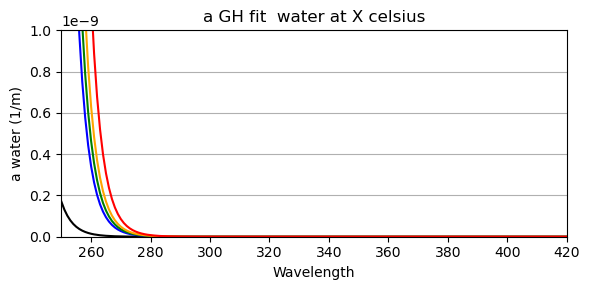

In [8]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
axes.plot(array, array_0K[2], color='black', linewidth=1.5)
axes.plot(array, array_T0[2], color='blue', linewidth=1.5)
axes.plot(array, array_T25[2], color='green', linewidth=1.5)
axes.plot(array, array_T50[2], color='orange', linewidth=1.5)
axes.plot(array, array_T99[2], color='red', linewidth=1.5)

axes.set_xlabel("Wavelength")
axes.set_ylabel("a water (1/m)")
axes.set_xlim(250, 420)
axes.set_ylim(1e-200, 1e-9)  # Adjust based on your data range
#axes.set_yscale('log')

#axes.axhline(y=0.00005, color='black', linewidth=0.25)
#axes.axhline(y=-0.00005, color='black', linewidth=0.25)
#axes.text(360, .06, '0 K', color='black')
#axes.text(360, .055, '99 C', color='red')
#axes.text(360, .05, '50 C', color='orange')
#axes.text(360, .045, '25 C', color='green')
#axes.text(360, .04, '0 C', color='blue')
#axes.text(360, .035, '~0 K', color='black')
plt.title('a GH fit  water at X celsius')
#plt.legend()
plt.grid(axis='y')
plt.tight_layout()

plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/Error_test_figs/T_water_correction_a_GH_fit.png")



In [9]:
print("array:", array[:5], "...")  # Print first 5 elements for a check
print("array_0K[1]:", array_0K[1][:5], "...")
print("array_T0[2]:", array_T0[2][:5], "...")

array: [250 251 252 253 254] ...
array_0K[1]: [0. 0. 0. 0. 0.] ...
array_T0[2]: [5.18010269e-09 3.90783960e-09 2.95462298e-09 2.23883960e-09
 1.70015385e-09] ...


In [10]:
from scipy.optimize import minimize 

## DO the TEMP correction ##

df_old = pd.read_csv('../../Dissertation_projects/Absorption_experiments/Data/Data_output_error_test_old_method.csv', sep=',', index_col=0)
df_old['wl'] = df_old.index
df_old = df_old[df_old['wl'] <= 420]

####### OLD ###########
wl = df_old['wl'].ravel()
df = df_old.drop('wl', axis = 1)

coln = np.arange(0, len(df.columns), 1, dtype=int)
Frames = []
frames = []

for col in coln:
    col_abs = df.iloc[:,col].ravel()
    res = minimize(rmse, 0, col_abs) 
    temp_val = res.x[0]
    cor = JF2007_aw_UV(wl, res.x)
    a = cor[0]
    col_ct = col_abs - a
    col_ct_data_frame = pd.DataFrame(col_ct)
    Frames.append(col_ct_data_frame)
    col_ct_resid = col_ct-(df.iloc[:,col].ravel())
    temp_rmse = np.sqrt(np.mean(col_ct_resid**2))
    dict = {'temp_val':[temp_val], 
           'temp_rmse':[temp_rmse]}
    diff = pd.DataFrame(dict)
    frames.append(diff) #save the inportant outputs 

outputs_old = pd.concat(frames, axis=0, ignore_index=False)
New_Labels = df.columns
outputs_old.index = list(New_Labels)

df_old_temp_corrected = pd.concat(Frames, axis=1, ignore_index=False)
New_Labels = df.columns
df_old_temp_corrected.columns = New_Labels
df_old_temp_corrected['wl'] = df_old['wl'].ravel()
df_old_temp_corrected.index = df_old_temp_corrected['wl']
df_old_temp_corrected = df_old_temp_corrected.drop('wl', axis = 1)
df_old_temp_corrected_copy = df_old_temp_corrected

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_14504\3855054993.py:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  wl = df_old['wl'].ravel()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_14504\3855054993.py:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  col_abs = df.iloc[:,col].ravel()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_14504\3855054993.py:26: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  col_ct_resid = col_ct-(df.iloc[:,col].ravel())
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_14504\3609135446.py:25: RuntimeWarning: invalid value encountered in sqrt
  Zc = (v ** (11 / 12) / np.sqrt(K)) ** (2 / 3)
C:\Users\hmlbr\AppData\

In [11]:

df_new = pd.read_csv('../../Dissertation_projects/Absorption_experiments/Data/Data_output_error_test_new_method.csv', sep=',', index_col=0)
df_new['wl'] = df_new.index
df_new = df_new[df_new['wl'] <= 420]
####### NEW ###########
wl = df_new['wl'].ravel()
df = df_new.drop('wl', axis = 1)

coln = np.arange(0, len(df.columns), 1, dtype=int)
Frames = []
frames = []

for col in coln:
    col_abs = df.iloc[:,col].ravel()
    res = minimize(rmse, 0, col_abs) 
    temp_val = res.x[0]
    cor = JF2007_aw_UV(wl, res.x)
    a = cor[0]
    col_ct = col_abs - a
    col_ct_data_frame = pd.DataFrame(col_ct)
    Frames.append(col_ct_data_frame)
    col_ct_resid = col_ct-(df.iloc[:,col].ravel())
    temp_rmse = np.sqrt(np.mean(col_ct_resid**2))
    dict = {'temp_val':[temp_val], 
           'temp_rmse':[temp_rmse]}
    diff = pd.DataFrame(dict)
    frames.append(diff) #save the inportant outputs 

outputs_new = pd.concat(frames, axis=0, ignore_index=False)
New_Labels = df.columns
outputs_new.index = list(New_Labels)

df_new_temp_corrected = pd.concat(Frames, axis=1, ignore_index=False)
New_Labels = df.columns
df_new_temp_corrected.columns = New_Labels
df_new_temp_corrected['wl'] = df_new['wl'].ravel()
df_new_temp_corrected.index = df_new_temp_corrected['wl']
df_new_temp_corrected = df_new_temp_corrected.drop('wl', axis = 1)
df_new_temp_corrected_copy = df_new_temp_corrected

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_14504\1110589249.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  wl = df_new['wl'].ravel()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_14504\1110589249.py:13: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  col_abs = df.iloc[:,col].ravel()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_14504\1110589249.py:21: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  col_ct_resid = col_ct-(df.iloc[:,col].ravel())
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_14504\1110589249.py:35: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()

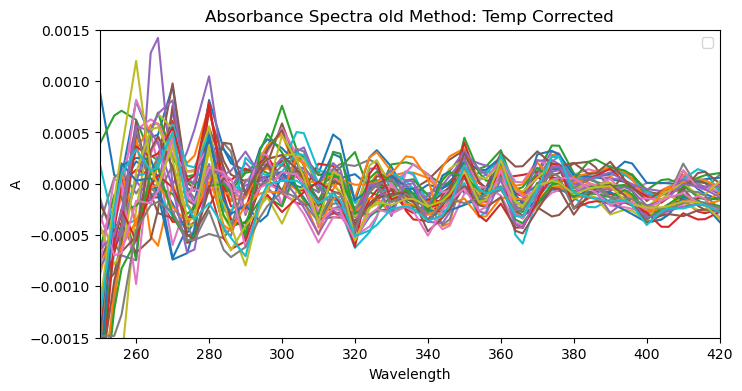

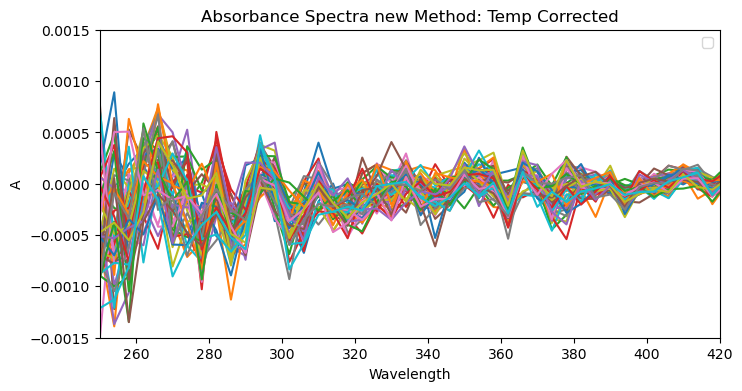

In [12]:
df_new_a = (df_new_temp_corrected*0.1)/(2.303)
df_old_a = (df_old_temp_corrected*0.1)/(2.303)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df_old_a.plot(ax=axs)
axs.set_xlim(250,420)
axs.set_ylim(-0.0015,0.0015)
axs.set_xlabel("Wavelength")
axs.set_ylabel("A")
axs.legend("")
axs.set_title("Absorbance Spectra old Method: Temp Corrected")
plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/Error_test_figs/Abs_scanns_temp_corr_old.png")


fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df_new_a.plot(ax=axs)
axs.set_xlim(250,420)
axs.set_ylim(-0.0015,0.0015)
axs.set_xlabel("Wavelength")
axs.set_ylabel("A")
axs.legend("")
axs.set_title("Absorbance Spectra new Method: Temp Corrected")
plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/Error_test_figs/Abs_scanns_temp_corr_new.png")


Text(0.5, 1.0, 'Absorption Spectra new Method')

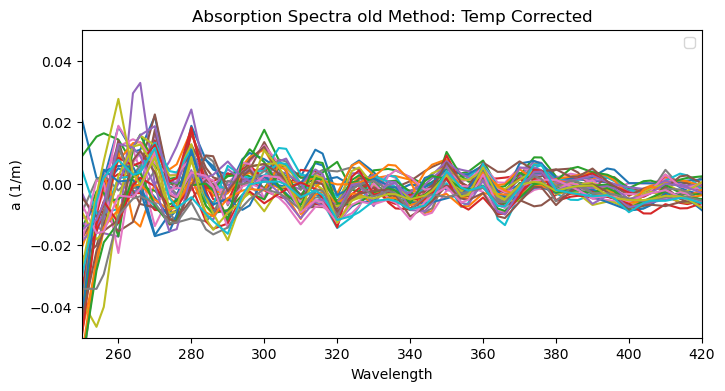

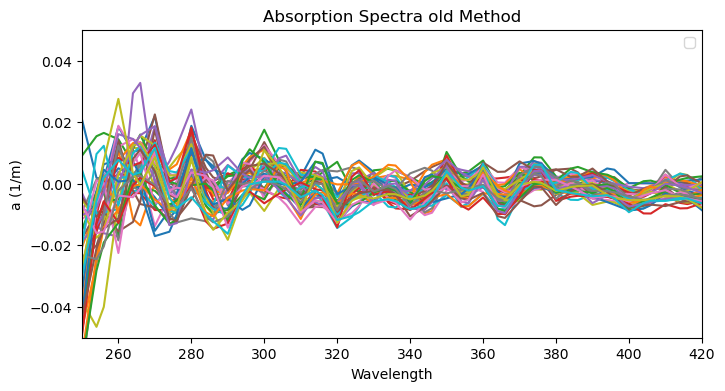

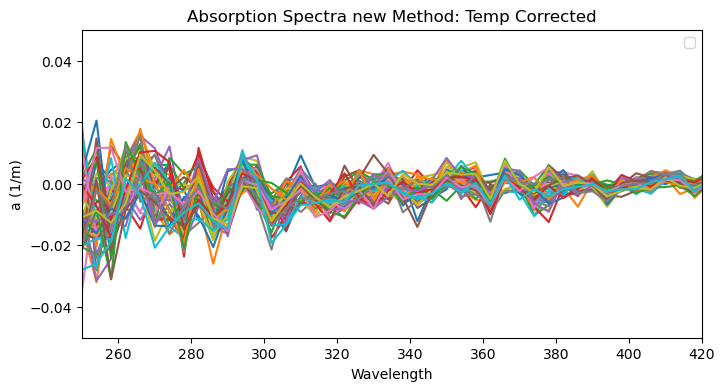

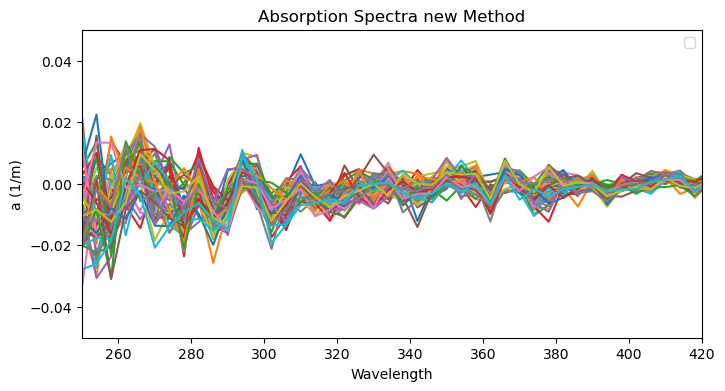

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df_old_temp_corrected.plot(ax=axs)
axs.set_xlim(250,420)
axs.set_ylim(-0.05,0.05)
axs.set_xlabel("Wavelength")
axs.set_ylabel("a (1/m)")
axs.legend("")
axs.set_title("Absorption Spectra old Method: Temp Corrected")

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df_old.plot(ax=axs)
axs.set_xlim(250,420)
axs.set_ylim(-0.05,0.05)
axs.set_xlabel("Wavelength")
axs.set_ylabel("a (1/m)")
axs.legend("")
axs.set_title("Absorption Spectra old Method")

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df_new_temp_corrected.plot(ax=axs)
axs.set_xlim(250,420)
axs.set_ylim(-0.05,0.05)
axs.set_xlabel("Wavelength")
axs.set_ylabel("a (1/m)")
axs.legend("")
axs.set_title("Absorption Spectra new Method: Temp Corrected")

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df_new.plot(ax=axs)
axs.set_xlim(250,420)
axs.set_ylim(-0.05,0.05)
axs.set_xlabel("Wavelength")
axs.set_ylabel("a (1/m)")
axs.legend("")
axs.set_title("Absorption Spectra new Method")

In [14]:
df_new_temp_corrected_copy

Sample6   Sample7   Sample8   Sample9  Sample10  Sample11  Sample12  \
wl                                                                          
250 -0.012652 -0.013857 -0.000445 -0.011228  0.014945  0.018545  0.001632   
252 -0.002888 -0.022918 -0.002957 -0.011522 -0.000097 -0.004774 -0.006002   
254  0.006860 -0.031995 -0.005472 -0.011821 -0.015150 -0.028117 -0.013642   
256  0.004055 -0.014785 -0.005964 -0.009431 -0.013656 -0.016107 -0.005696   
258  0.001238  0.002412 -0.006459 -0.007044 -0.012171 -0.004116  0.002245   
..        ...       ...       ...       ...       ...       ...       ...   
412  0.000764  0.003400  0.003125  0.002290  0.002604  0.001396  0.001286   
414  0.001687  0.002446  0.003379  0.001347  0.002098  0.001457  0.001183   
416  0.000733  0.000156  0.000800 -0.000035  0.001443  0.000515  0.000930   
418 -0.000222 -0.002134 -0.001779 -0.001416  0.000787 -0.000426  0.000677   
420  0.001645 -0.000176  0.000800  0.001739  0.002089  0.001695  0.000942   

     Sample13  Sample14  Sample15  ...  Sample46  Sample47  Sample48  \
wl                                 ...                                 
250 -0.014963 -0.005024 -0.002400  ... -0.011855 -0.019761 -0.021369   
252 -0.016698 -0.007235 -0.008839  ... -0.013958 -0.010451 -0.014931   
254 -0.018440 -0.009477 -0.015283  ... -0.016062 -0.001146 -0.008497   
256 -0.011494 -0.005264 -0.009929  ... -0.011982 -0.003993 -0.019741   
258 -0.004552 -0.001076 -0.004579  ... -0.007903 -0.006843 -0.030989   
..        ...       ...       ...  ...       ...       ...       ...   
412  0.003323  0.002644  0.003267  ...  0.000495 -0.000112 -0.000767   
414  0.003347  0.001693  0.003602  ...  0.000046 -0.000907 -0.000445   
416  0.002438  0.001087  0.001645  ... -0.000530 -0.000089 -0.002229   
418  0.001528  0.000480 -0.000313  ... -0.001106  0.000729 -0.004014   
420  0.000861  0.002315  0.001196  ... -0.000242  0.000844 -0.001941   

     Sample49  Sample50  Sample51  Sample52  Sample53  Sample54  Sample55  
wl                                                                         
250 -0.000311 -0.011767 -0.021305 -0.007584 -0.020857 -0.010940 -0.027937  
252 -0.003820 -0.012002 -0.010048  0.002010 -0.011479 -0.009833 -0.026954  
254 -0.007340 -0.012238  0.001209  0.011588 -0.002104 -0.008730 -0.025971  
256 -0.012355 -0.011037 -0.014918  0.011641 -0.004972 -0.010704 -0.022305  
258 -0.017377 -0.009838 -0.031046  0.011682 -0.007842 -0.012682 -0.018640  
..        ...       ...       ...       ...       ...       ...       ...  
412  0.001496  0.001989  0.000656  0.001188  0.003161  0.000683  0.001946  
414  0.001070  0.000895  0.000414  0.001247  0.002966 -0.000721  0.002441  
416  0.000806 -0.000671 -0.001152 -0.000812  0.000179 -0.001020 -0.000023  
418  0.000542 -0.002237 -0.002718 -0.002872 -0.002607 -0.001320 -0.002488  
420  0.001649 -0.000268 -0.001843 -0.001374 -0.000673 -0.000179 -0.000783  

[86 rows x 50 columns]

In [15]:
list_cols_old = df_old_temp_corrected_copy.columns
list_cols_new = df_new_temp_corrected_copy.columns
list_cols_old

Index(['Sample262', 'Sample263', 'Sample264', 'Sample265', 'Sample266',
       'Sample267', 'Sample268', 'Sample269', 'Sample270', 'Sample271',
       'Sample272', 'Sample273', 'Sample274', 'Sample275', 'Sample276',
       'Sample277', 'Sample278', 'Sample279', 'Sample280', 'Sample281',
       'Sample282', 'Sample283', 'Sample284', 'Sample285', 'Sample286',
       'Sample287', 'Sample288', 'Sample289', 'Sample290', 'Sample291',
       'Sample292', 'Sample293', 'Sample294', 'Sample295', 'Sample296',
       'Sample297', 'Sample298', 'Sample299', 'Sample300', 'Sample301'],
      dtype='object')

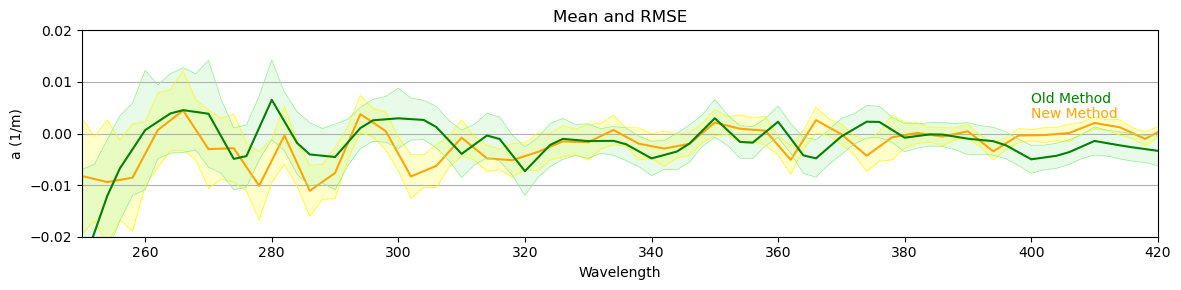

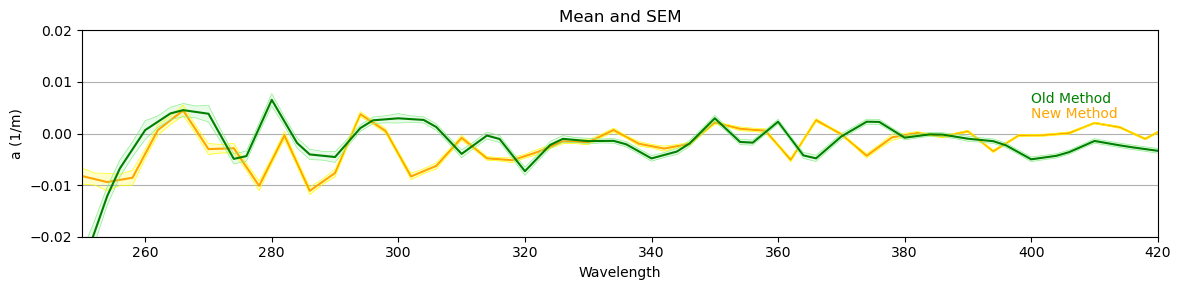

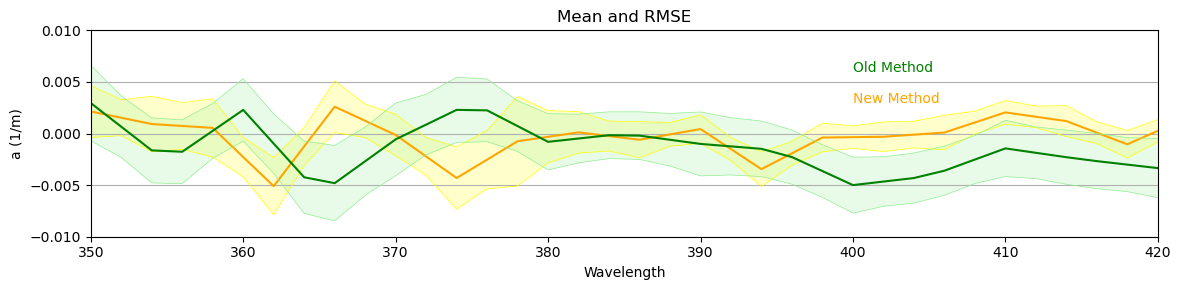

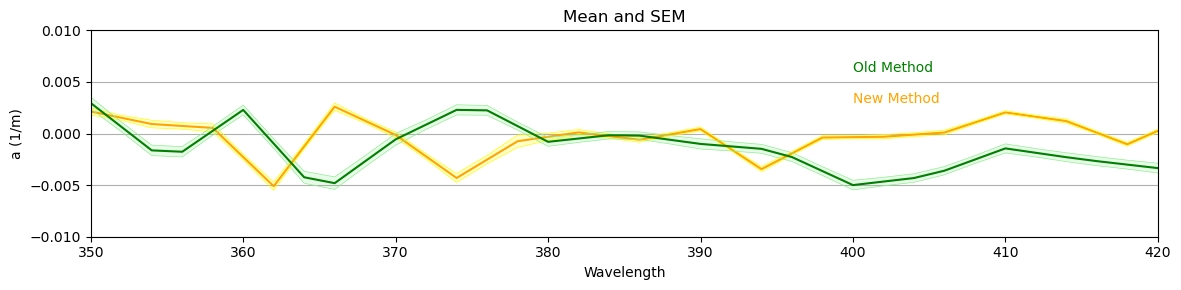

In [16]:
df_old_temp_corrected = df_old_temp_corrected[[col for col in df_old_temp_corrected.columns if col in list_cols_old]]
df_new_temp_corrected = df_new_temp_corrected[[col for col in df_new_temp_corrected.columns if col in list_cols_new]]

df_o = df_old_temp_corrected
df_n = df_new_temp_corrected

# Calculate RMSE and mean for each row OLD
df_old_temp_corrected['mean_old'] = df_o.mean(axis=1)
df_old_temp_corrected['rmse_old'] = np.sqrt(((df_o.sub(df_o.mean(axis=1), axis=0)) ** 2).mean(axis=1))
df_old_temp_corrected['rmse_up_old'] = df_old_temp_corrected['mean_old'] + df_old_temp_corrected['rmse_old']
df_old_temp_corrected['rmse_down_old'] = df_old_temp_corrected['mean_old'] - df_old_temp_corrected['rmse_old']

df_old_temp_corrected['sem_old'] = df_o.sem(axis=1)
df_old_temp_corrected['sem_up_old'] = df_old_temp_corrected['mean_old'] + df_old_temp_corrected['sem_old']
df_old_temp_corrected['sem_down_old'] = df_old_temp_corrected['mean_old'] - df_old_temp_corrected['sem_old']

df_rmse_old = df_old_temp_corrected.drop(list_cols_old, axis=1)

# Calculate RMSE and mean for each row NEW
df_new_temp_corrected['mean_new'] = df_n.mean(axis=1)
df_new_temp_corrected['rmse_new'] = np.sqrt(((df_n.sub(df_n.mean(axis=1), axis=0)) ** 2).mean(axis=1))
df_new_temp_corrected['rmse_up_new'] = df_new_temp_corrected['mean_new'] + df_new_temp_corrected['rmse_new']
df_new_temp_corrected['rmse_down_new'] = df_new_temp_corrected['mean_new'] - df_new_temp_corrected['rmse_new']

df_new_temp_corrected['sem_new'] = df_n.sem(axis=1)
df_new_temp_corrected['sem_up_new'] = df_new_temp_corrected['mean_new'] + df_new_temp_corrected['sem_new']
df_new_temp_corrected['sem_down_new'] = df_new_temp_corrected['mean_new'] - df_new_temp_corrected['sem_new']

df_rmse_new = df_new_temp_corrected.drop(list_cols_new, axis=1)

###### PLOT RMSE ######
df = df_rmse_new
df['wl'] = df.index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))
axes.fill_between(df['wl'], df['rmse_up_new'], df['rmse_down_new'], alpha=.2, linewidth=0, color='yellow')
axes.plot(df['wl'], df['mean_new'], color='orange', linewidth=1.5)
axes.plot(df['wl'], df['rmse_up_new'], color='yellow', linewidth=0.5)
axes.plot(df['wl'], df['rmse_down_new'], color='yellow', linewidth=0.5)

df = df_rmse_old
df['wl'] = df.index
axes.plot(df['wl'], df['mean_old'], color='green', linewidth=1.5)
axes.fill_between(df['wl'], df['rmse_up_old'], df['rmse_down_old'], alpha=.2, linewidth=0, color='lightgreen')
axes.plot(df['wl'], df['rmse_up_old'], color='lightgreen', linewidth=0.5)
axes.plot(df['wl'], df['rmse_down_old'], color='lightgreen', linewidth=0.5)

axes.set_xlabel("Wavelength")
axes.set_ylabel("a (1/m)")
axes.set_xlim(250, 420)
axes.set_ylim(-0.02, 0.02)
axes.text(400, .006, 'Old Method', color='green')
axes.text(400, .003, 'New Method', color='orange')
plt.title('Mean and RMSE')
#plt.legend()
plt.grid(axis='y')
plt.tight_layout()


plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/Error_test_figs/RMSE_old_new_tcorr.png")


###### PLOT SEM ######
df = df_rmse_new
df['wl'] = df.index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))
axes.fill_between(df['wl'], df['sem_up_new'], df['sem_down_new'], alpha=.2, linewidth=0, color='yellow')
axes.plot(df['wl'], df['mean_new'], color='orange', linewidth=1.5)
axes.plot(df['wl'], df['sem_up_new'], color='yellow', linewidth=0.5)
axes.plot(df['wl'], df['sem_down_new'], color='yellow', linewidth=0.5)

df = df_rmse_old
df['wl'] = df.index
axes.plot(df['wl'], df['mean_old'], color='green', linewidth=1.5)
axes.fill_between(df['wl'], df['sem_up_old'], df['sem_down_old'], alpha=.2, linewidth=0, color='lightgreen')
axes.plot(df['wl'], df['sem_up_old'], color='lightgreen', linewidth=0.5)
axes.plot(df['wl'], df['sem_down_old'], color='lightgreen', linewidth=0.5)

axes.set_xlabel("Wavelength")
axes.set_ylabel("a (1/m)")
axes.set_xlim(250, 420)
axes.set_ylim(-0.02, 0.02)
axes.text(400, .006, 'Old Method', color='green')
axes.text(400, .003, 'New Method', color='orange')
plt.title('Mean and SEM')
#plt.legend()
plt.grid(axis='y')
plt.tight_layout()


plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/Error_test_figs/SEM_old_new_tcorr.png")


###### PLOT RMSE CLOSE ######
df = df_rmse_new
df['wl'] = df.index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))
axes.fill_between(df['wl'], df['rmse_up_new'], df['rmse_down_new'], alpha=.2, linewidth=0, color='yellow')
axes.plot(df['wl'], df['mean_new'], color='orange', linewidth=1.5)
axes.plot(df['wl'], df['rmse_up_new'], color='yellow', linewidth=0.5)
axes.plot(df['wl'], df['rmse_down_new'], color='yellow', linewidth=0.5)

df = df_rmse_old
df['wl'] = df.index
axes.plot(df['wl'], df['mean_old'], color='green', linewidth=1.5)
axes.fill_between(df['wl'], df['rmse_up_old'], df['rmse_down_old'], alpha=.2, linewidth=0, color='lightgreen')
axes.plot(df['wl'], df['rmse_up_old'], color='lightgreen', linewidth=0.5)
axes.plot(df['wl'], df['rmse_down_old'], color='lightgreen', linewidth=0.5)

axes.set_xlabel("Wavelength")
axes.set_ylabel("a (1/m)")
axes.set_xlim(350, 420)
axes.set_ylim(-0.01, 0.01)
axes.text(400, .006, 'Old Method', color='green')
axes.text(400, .003, 'New Method', color='orange')
plt.title('Mean and RMSE')
#plt.legend()
plt.grid(axis='y')
plt.tight_layout()


plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/Error_test_figs/RMSE_old_new_tcorr_close.png")


###### PLOT SEM CLOSE ######
df = df_rmse_new
df['wl'] = df.index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))
axes.fill_between(df['wl'], df['sem_up_new'], df['sem_down_new'], alpha=.2, linewidth=0, color='yellow')
axes.plot(df['wl'], df['mean_new'], color='orange', linewidth=1.5)
axes.plot(df['wl'], df['sem_up_new'], color='yellow', linewidth=0.5)
axes.plot(df['wl'], df['sem_down_new'], color='yellow', linewidth=0.5)

df = df_rmse_old
df['wl'] = df.index
axes.plot(df['wl'], df['mean_old'], color='green', linewidth=1.5)
axes.fill_between(df['wl'], df['sem_up_old'], df['sem_down_old'], alpha=.2, linewidth=0, color='lightgreen')
axes.plot(df['wl'], df['sem_up_old'], color='lightgreen', linewidth=0.5)
axes.plot(df['wl'], df['sem_down_old'], color='lightgreen', linewidth=0.5)

axes.set_xlabel("Wavelength")
axes.set_ylabel("a (1/m)")
axes.set_xlim(350, 420)
axes.set_ylim(-0.01, 0.01)
axes.text(400, .006, 'Old Method', color='green')
axes.text(400, .003, 'New Method', color='orange')
plt.title('Mean and SEM')
#plt.legend()
plt.grid(axis='y')
plt.tight_layout()


plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/Error_test_figs/SEM_old_new_tcorr_close.png")


df_stats_post_new = df_rmse_new
df_stats_post_old = df_rmse_old

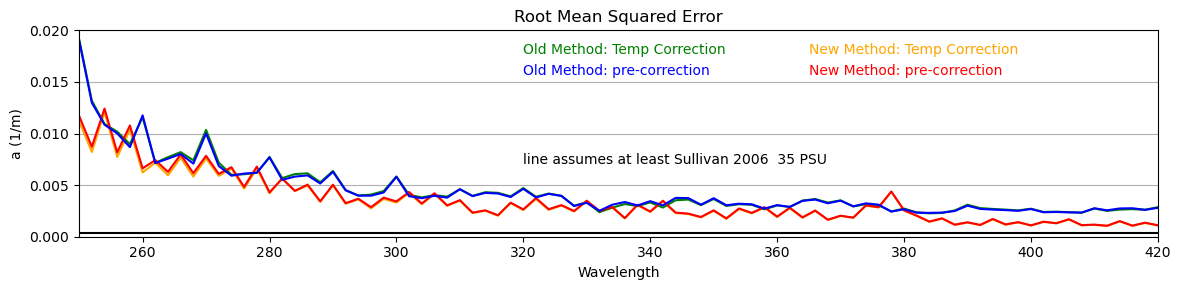

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))
axes.plot(df_stats_post_new['wl'], df_stats_post_new['rmse_new'], color='orange', linewidth=1.5)
axes.plot(df_stats_post_old['wl'], df_stats_post_old['rmse_old'], color='green', linewidth=1.5)
axes.plot(df_stats_pre_new['wl'], df_stats_pre_new['rmse_new'], color='red', linewidth=1.5)
axes.plot(df_stats_pre_old['wl'], df_stats_pre_old['rmse_old'], color='blue', linewidth=1.5)

axes.set_xlabel("Wavelength")
axes.set_ylabel("a (1/m)")
axes.set_xlim(250, 420)
axes.set_ylim(0, 0.02)
axes.axhline(y=0.00035, color='black', linewidth=1.5)
axes.text(320, .0177, 'Old Method: Temp Correction', color='green')
axes.text(365, .0177, 'New Method: Temp Correction', color='orange')
axes.text(320, .0157, 'Old Method: pre-correction', color='blue')
axes.text(365, .0157, 'New Method: pre-correction', color='red')
axes.text(320, .007, 'line assumes at least Sullivan 2006  35 PSU  ', color='black')
plt.title('Root Mean Squared Error')
#plt.legend()
plt.tight_layout()

plt.grid(axis='y')

plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/Error_test_figs/RMSE_temp_corr_old_new.png")


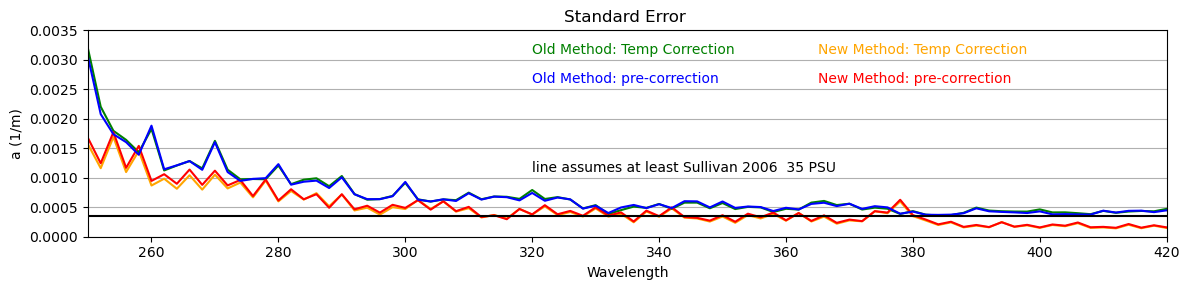

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))
axes.plot(df_stats_post_new['wl'], df_stats_post_new['sem_new'], color='orange', linewidth=1.5)
axes.plot(df_stats_post_old['wl'], df_stats_post_old['sem_old'], color='green', linewidth=1.5)
axes.plot(df_stats_pre_new['wl'], df_stats_pre_new['sem_new'], color='red', linewidth=1.5)
axes.plot(df_stats_pre_old['wl'], df_stats_pre_old['sem_old'], color='blue', linewidth=1.5)

axes.set_xlabel("Wavelength")
axes.set_ylabel("a (1/m)")
axes.set_xlim(250, 420)
axes.set_ylim(0, 0.0035)
axes.axhline(y=0.00035, color='black', linewidth=1.5)
axes.text(320, .0031, 'Old Method: Temp Correction', color='green')
axes.text(365, .0031, 'New Method: Temp Correction', color='orange')
axes.text(320, .0026, 'Old Method: pre-correction', color='blue')
axes.text(365, .0026, 'New Method: pre-correction', color='red')
axes.text(320, .0011, 'line assumes at least Sullivan 2006  35 PSU  ', color='black')
plt.title('Standard Error ')
plt.tight_layout()
#plt.legend()
plt.grid(axis='y')

plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/Error_test_figs/SEM_temp_corr_old_new.png")
